In [ ]:
import pandas as pd
import umap
from matplotlib import pyplot as plt

/Users/jac340/envs/general/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# define compounds in scope as a dictionary

scope_compounds_dict = {
    "8a": "EN300-20027",
    "8b": "EN300-18989",
    "8c": "AJC001",
    "8d": "EN300-13206",
    "8e": "EN300-16958",
    "8f": "EN300-20348",
    "8g": "EN300-62688",
    "8h": "AJC002",
    "8i": "EN300-43319",
    "8j": "EN300-61954",
    "8k": "EN300-39266",
    "8l": "AJC003",
    "8m": "EN300-49064",
    "8n": "EN300-18739",
    "8o": "EN300-77249",
    "8p": "EN300-12163",
    "8q": "EN300-19571",
    "8r": "EN300-20439",
    "8s": "EN300-75686",
    "8t": "AJC004",
    "8u": "EN300-41781",
    "8v": "EN300-21136",
    "8w": "EN300-7578636",
    "8x": "EN300-19392",
    "8y": "EN300-20438",
    "12": "AJC005"
}

In [3]:
# load in the CSV files for the 1024 and 2048 bit fingerprints
df_1024bit = pd.read_csv('enamine_primary_amines_1024bit_fingerprints.csv', index_col=0)
df_2048bit = pd.read_csv('enamine_primary_amines_2048bit_fingerprints.csv', index_col=0)

In [4]:
# remove the unused columns
df_1024bit = df_1024bit.drop(columns=['SMILES'])
df_2048bit = df_2048bit.drop(columns=['SMILES'])

In [5]:
# UMAP space for both sets of fingerprints

umap_1024 = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
umap_2048 = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)

umap_reduced_1024 = umap_1024.fit_transform(df_1024bit)
umap_reduced_2048 = umap_2048.fit_transform(df_2048bit)

/Users/jac340/envs/general/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/jac340/envs/general/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/jac340/envs/general/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
# add UMAP results to the dataframes

df_1024bit['UMAP1'] = umap_reduced_1024[:, 0]
df_1024bit['UMAP2'] = umap_reduced_1024[:, 1]
df_2048bit['UMAP1'] = umap_reduced_2048[:, 0]
df_2048bit['UMAP2'] = umap_reduced_2048[:, 1]

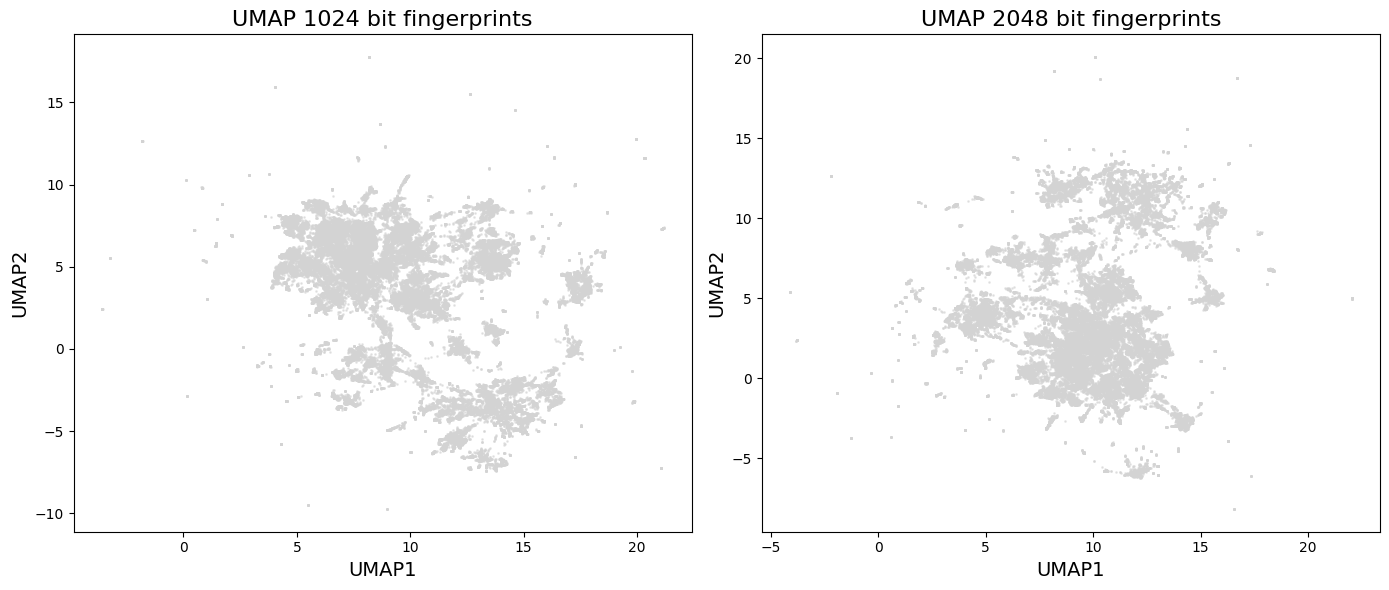

In [7]:
# plot umap spaces

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(df_1024bit['UMAP1'], df_1024bit['UMAP2'], s=1, alpha=0.5, color='lightgray')
axes[0].set_title('UMAP 1024 bit fingerprints', fontsize=16)
axes[0].set_xlabel('UMAP1', fontsize=14)
axes[0].set_ylabel('UMAP2', fontsize=14)

axes[1].scatter(df_2048bit['UMAP1'], df_2048bit['UMAP2'], s=1, alpha=0.5, color='lightgray')
axes[1].set_title('UMAP 2048 bit fingerprints', fontsize=16)
axes[1].set_xlabel('UMAP1', fontsize=14)
axes[1].set_ylabel('UMAP2', fontsize=14)

plt.tight_layout()
plt.show()

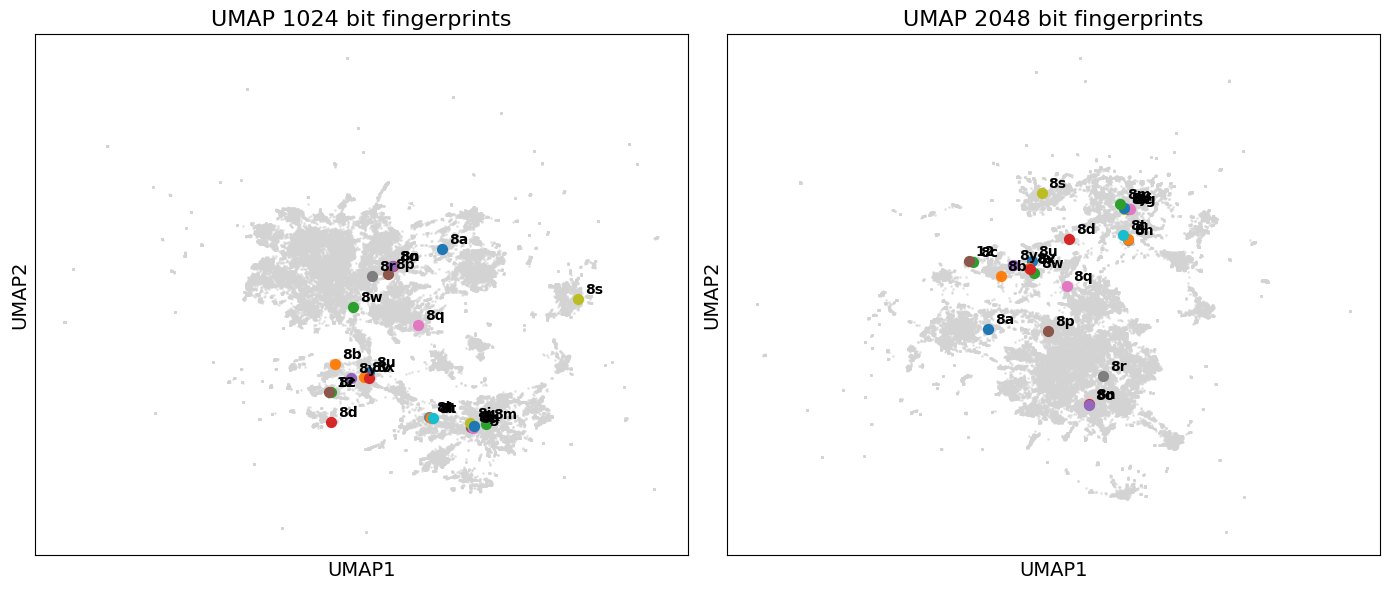

In [12]:
# plot umap spaces

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(df_1024bit['UMAP1'], df_1024bit['UMAP2'], s=1, alpha=0.5, color='lightgray')
axes[0].set_title('UMAP 1024 bit fingerprints', fontsize=16)
axes[0].set_xlabel('UMAP1', fontsize=14)
axes[0].set_ylabel('UMAP2', fontsize=14)
for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df_1024bit.index:
        axes[0].scatter(df_1024bit.loc[enamine_id, 'UMAP1'], df_1024bit.loc[enamine_id, 'UMAP2'], s=50, label=label)
        axes[0].text(
            df_1024bit.loc[enamine_id, 'UMAP1']+0.3,
            df_1024bit.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )

axes[1].scatter(df_2048bit['UMAP1'], df_2048bit['UMAP2'], s=1, alpha=0.5, color='lightgray')
axes[1].set_title('UMAP 2048 bit fingerprints', fontsize=16)
axes[1].set_xlabel('UMAP1', fontsize=14)
axes[1].set_ylabel('UMAP2', fontsize=14)
for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df_2048bit.index:
        axes[1].scatter(df_2048bit.loc[enamine_id, 'UMAP1'], df_2048bit.loc[enamine_id, 'UMAP2'], s=50, label=label)
        axes[1].text(
            df_2048bit.loc[enamine_id, 'UMAP1']+0.3,
            df_2048bit.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )

        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# export the dataframes with the fingerprints and the TSNE and UMAP coordinates to CSV files
df_1024bit.to_csv('enamine_primary_amines_1024bit_fingerprints_with_UMAP.csv', index=True)
df_2048bit.to_csv('enamine_primary_amines_2048bit_fingerprints_with_UMAP.csv', index=True)